<h1 style="font-size:40px; color:darkgreen;">Covid-19 Data Analysis</h1>


## 1. Objective

The main objective of this project is to:
✔️ Analyze the COVID-19 dataset to explore patterns and relationships among variables such as confirmed cases, active cases, recoveries (passive cases), deaths, vaccination doses, and population.

✔️ Develop regression models to predict the number of deaths based on the available features.

✔️ Compare three different models:

Simple Linear Regression (SLR) — using only 'confirmed' cases as the predictor.

Multiple Linear Regression (MLR) — using 'confirmed', 'active', and 'passive' cases as predictors.

Polynomial Regression — applying a non-linear transformation to 'confirmed', 'active', and 'passive' cases.

✔️ Evaluate models using performance metrics: R² Score and Mean Squared Error (MSE).

✔️ Select the best model based on its performance and complexity.

## 2. Data Collection

✔️ The dataset is sourced from Kaggle, a popular data science platform.
✔️ The dataset contains COVID-19 case statistics across various states in India (or a similar region depending on the exact dataset).

## 3. Data Preprocessing

Data preprocessing involves several steps to ensure the data is clean and consistent:

        1.Data Integration - Integration of data from multiple sources.
        2.Missing Values - Handle any missing values by either imputing them or removing incomplete records.
        3.Data Transformation - Convert data into a suitable format for analysis, including standardizing units of measurement.
        4.Timestamp Alignment - Synchronize timestamps to ensure data from different sources can be compared accurately...

## 4. Exploratory Data Analysis (EDA)

The EDA process helps in understanding the dataset by summarizing its mai characteristic using visual methods. This include

         # Descriptive Statistics: Calculate mean, median, mode, standard deviation, and other statistical measures for different weather parameters
         # Data Visualization: Various visual methods were employed to identify patterns, trends, and outliers in the data, such as histograms, box plots, scatter plots, and line charts charts

###  Import The Necessary Libraries


In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error,r2_score

### Load The Dataset

In [23]:
df=pd.read_csv("C:/Users/HP/OneDrive/Desktop/data science/Covid-19_Analysis/covid-19.csv")
df

,state,confirmed,active,passive,deaths,dose1,dose2,dose3,precaution_dose,total_doses,population
0,Andaman and Nicobar,10742,1,10612,129,313284,320383,236936,53427,991263,426251
1,Andhra Pradesh,2339067,3,2324331,14733,40643161,43549055,11703273,6579565,110556756,52883163
2,Arunachal Pradesh,66890,0,66594,296,860442,747177,72403,58618,1911760,1528296
3,Assam,746100,0,738065,8035,22549957,20561790,2082670,1259853,50284713,34586234
4,Bihar,851379,15,839062,12302,62944633,59144387,11983504,3868082,157197041,119461013
5,Chandigarh,99348,6,98161,1181,1089254,917701,48480,63046,2282281,1182104
6,Chhattisgarh,1177749,6,1163597,14146,18955635,18534989,5737679,1804891,49148991,28566990
7,Dadra and Nagar Haveli and Daman and Diu,11591,0,11587,4,730746,594929,136967,22486,1578492,657391
8,Delhi,2007188,35,1980632,26521,16600054,14348835,2312803,1053393,37366540,18802494
9,Goa,259079,26,255040,4013,1354828,1224173,60838,76559,2872582,1542750


### Basic Analysis

In [29]:
df.shape

(36, 11)

In [25]:
df.head(5)

,state,confirmed,active,passive,deaths,dose1,dose2,dose3,precaution_dose,total_doses,population
0,Andaman and Nicobar,10742,1,10612,129,313284,320383,236936,53427,991263,426251
1,Andhra Pradesh,2339067,3,2324331,14733,40643161,43549055,11703273,6579565,110556756,52883163
2,Arunachal Pradesh,66890,0,66594,296,860442,747177,72403,58618,1911760,1528296
3,Assam,746100,0,738065,8035,22549957,20561790,2082670,1259853,50284713,34586234
4,Bihar,851379,15,839062,12302,62944633,59144387,11983504,3868082,157197041,119461013


In [27]:
df.tail(5)

,state,confirmed,active,passive,deaths,dose1,dose2,dose3,precaution_dose,total_doses,population
31,Telengana,841324,71,837142,4111,29607672,29053708,10525975,2702159,77201709,38472769
32,Tripura,108034,0,107094,940,2658852,2328613,271434,204733,5916312,4057847
33,Uttar Pradesh,2128103,46,2104424,23633,154058287,147716010,35623544,9240735,390639497,228959599
34,Uttarakhand,449379,28,441600,7751,8180312,7940592,1346150,867047,20051714,11090425
35,West Bengal,2118606,58,2097016,21532,67300236,61593452,10257324,5491943,155962840,97694960


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   state            36 non-null     object
 1   confirmed        36 non-null     int64 
 2   active           36 non-null     int64 
 3   passive          36 non-null     int64 
 4   deaths           36 non-null     int64 
 5   dose1            36 non-null     int64 
 6   dose2            36 non-null     int64 
 7   dose3            36 non-null     int64 
 8   precaution_dose  36 non-null     int64 
 9   total_doses      36 non-null     int64 
 10  population       36 non-null     int64 
dtypes: int64(10), object(1)
memory usage: 3.2+ KB


In [33]:
df.columns

Index(['state', 'confirmed', 'active', 'passive', 'deaths', 'dose1', 'dose2',
       'dose3', 'precaution_dose', 'total_doses', 'population'],
      dtype='object')

In [50]:
df.describe()

,confirmed,active,passive,deaths,dose1,dose2,dose3,precaution_dose,total_doses,population
count,3.600000e+01,36.000000,3.600000e+01,36.000000,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01,3.600000e+01
mean,1.241053e+06,98.666667,1.226213e+06,14741.611111,2.555372e+07,2.398740e+07,4.286358e+06,1.892749e+06,6.098716e+07,3.712387e+07
std,1.833873e+06,305.722844,1.808032e+06,27168.565338,3.234424e+07,3.063309e+07,6.862957e+06,2.312095e+06,7.921462e+07,4.835507e+07
min,1.074200e+04,0.000000,1.061200e+04,4.000000,5.690800e+04,5.599200e+04,1.575700e+04,6.949000e+03,1.450080e+05,7.221000e+04
25%,1.058625e+05,1.000000,1.048608e+05,1120.750000,1.045166e+06,8.887390e+05,1.312262e+05,6.647575e+04,2.279865e+06,1.539136e+06
50%,6.127550e+05,10.500000,6.063365e+05,6541.000000,1.777784e+07,1.519745e+07,1.280998e+06,8.453680e+05,4.052818e+07,2.309525e+07
75%,1.320729e+06,46.750000,1.311100e+06,14292.750000,4.281102e+07,4.428936e+07,5.811635e+06,3.066116e+06,1.117488e+08,5.563917e+07
max,8.136588e+06,1389.000000,7.988008e+06,148416.000000,1.540583e+08,1.477160e+08,3.562354e+07,9.240735e+06,3.906395e+08,2.289596e+08


### Data Preprocessing

In [39]:
df.isnull().sum()

state              0
confirmed          0
active             0
passive            0
deaths             0
dose1              0
dose2              0
dose3              0
precaution_dose    0
total_doses        0
population         0
dtype: int64

In [45]:
df.duplicated().sum()

0

### Exploratory Data Analysis (EDA)

#### State wise Analysis

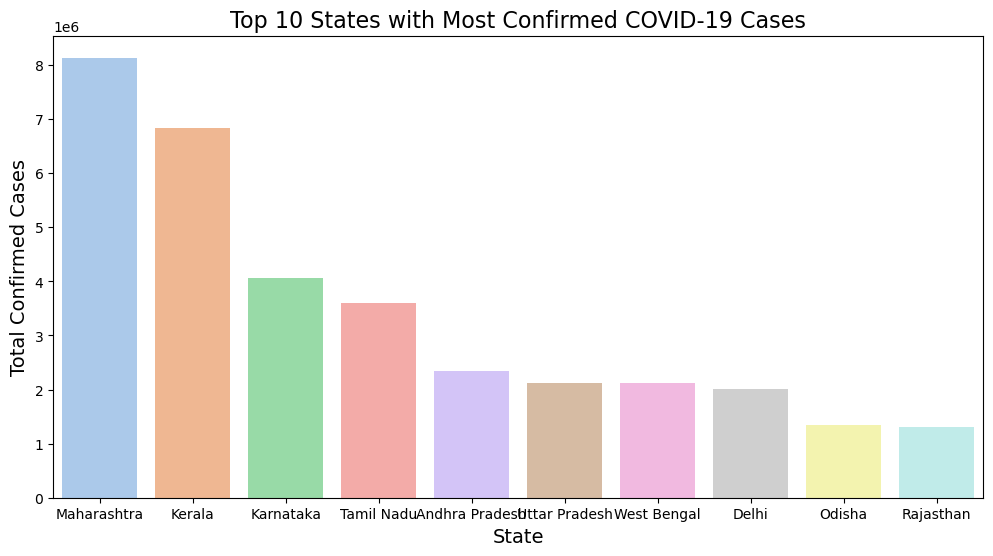

In [126]:
state_counts = df.groupby('state')['confirmed'].sum().sort_values(ascending=False)
top_10_states = state_counts.head(10).reset_index()

plt.figure(figsize=(12,6))
sns.barplot(data=top_10_states, x='state', y='confirmed', hue='state', palette='pastel', legend=False)
plt.title('Top 10 States with Most Confirmed COVID-19 Cases', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Total Confirmed Cases', fontsize=14)
plt.show()

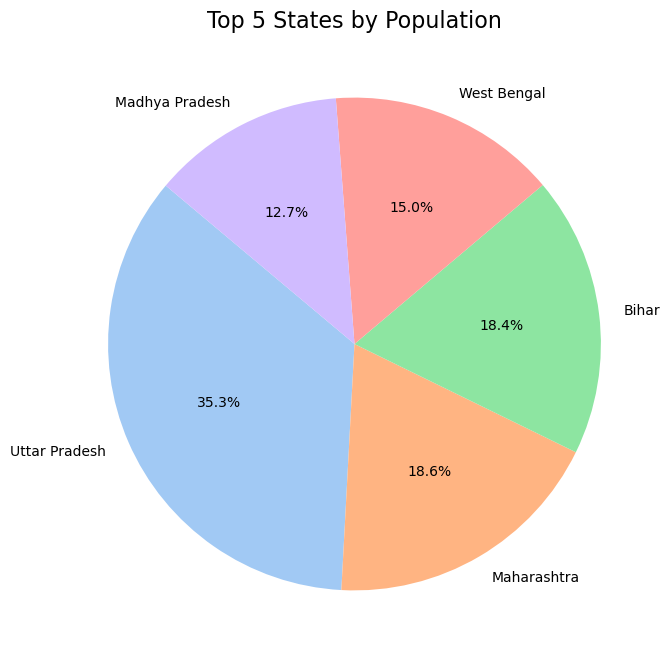

In [114]:
state_counts = df.groupby('state')['population'].sum().sort_values(ascending=False)
top_5_states = state_counts.head(5)

plt.figure(figsize=(8,8))
plt.pie(top_5_states.values, labels=top_5_states.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Top 5 States by Population', fontsize=16)
plt.show()

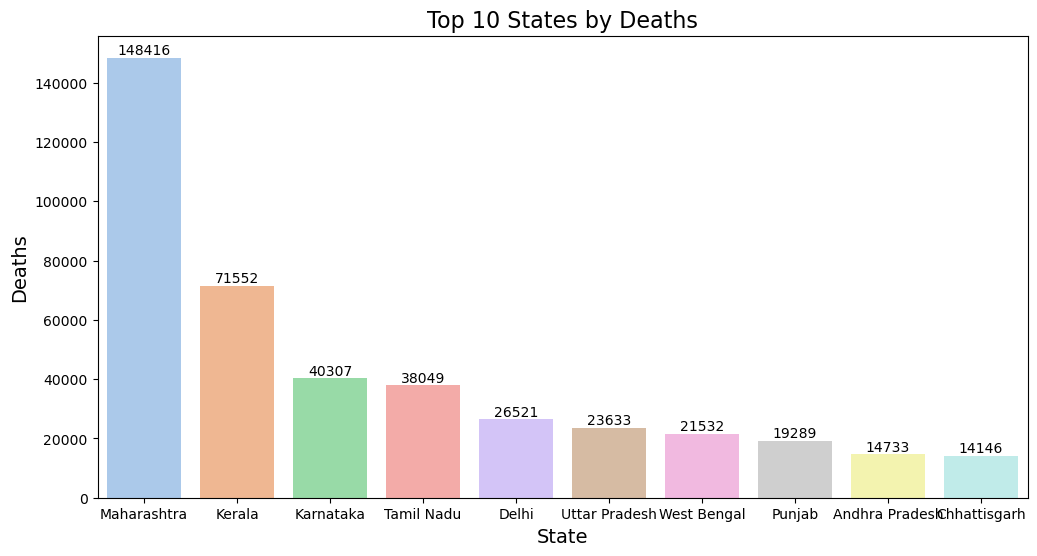

In [130]:
state_counts = df.groupby('state')['deaths'].sum().sort_values(ascending=False)
top_10_states = state_counts.head(10).reset_index()

plt.figure(figsize=(12,6))
barplot = sns.barplot(data=top_10_states, x='state', y='deaths', hue='state', palette='pastel', legend=False)
plt.title('Top 10 States by Deaths', fontsize=16)
plt.xlabel('State', fontsize=14)
plt.ylabel('Deaths', fontsize=14)

for bars in barplot.containers:
    barplot.bar_label(bars)
plt.show()

### From this above we can see that the 
                   1.Most of covid_19 conformed cases in Maharashtra
                   2.Most population state is Uttar pradesh
                   3.Most deaths in Maharasthra

#### Dose in Statewise

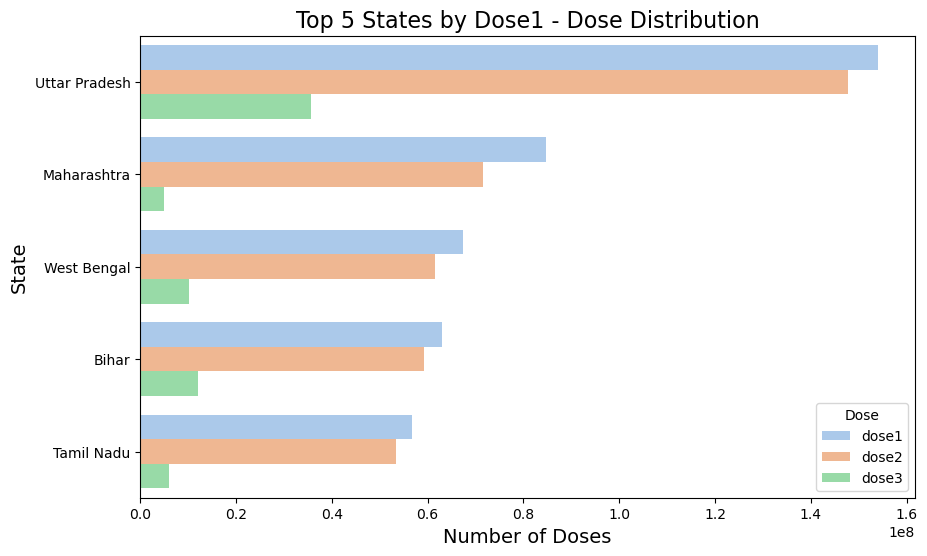

In [152]:
top_states = df.sort_values(by='dose1', ascending=False).head(5)
df_melt = top_states.melt(id_vars='state', value_vars=['dose1', 'dose2', 'dose3'], var_name='Dose', value_name='Count')

plt.figure(figsize=(10,6))
sns.barplot(data=df_melt, y='state', x='Count', hue='Dose', palette='pastel')
plt.title('Top 5 States by Dose1 - Dose Distribution', fontsize=16)
plt.xlabel('Number of Doses', fontsize=14)
plt.ylabel('State', fontsize=14)
plt.legend(title='Dose')
plt.show()


#### From the above analysis, we can see that Uttar Pradesh has administered the highest number of all doses

### Model Evaluation

#### 1. Simple Linear Regression

In [180]:
x = df[['confirmed']]  
y = df['deaths']  

In [188]:
x_train = x_train.values.reshape(-1, 1)
y_train = y_train.values.reshape(-1, 1) 

In [204]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [206]:
slr_model = LinearRegression()
slr_model.fit(x_train, y_train)

LinearRegression()

In [210]:
print("Intercept:", slr_model.intercept_)
print("Coefficient:", slr_model.coef_)

Intercept: -3698.694877700673
Coefficient: [0.01609572]


In [212]:
y_pred = slr_model.predict(x_test)

In [216]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R2 Score: {:.2f}".format(r2))
print("Mean Squared Error: {:.2f}".format(mse))

R2 Score: 0.63
Mean Squared Error: 200228856.73


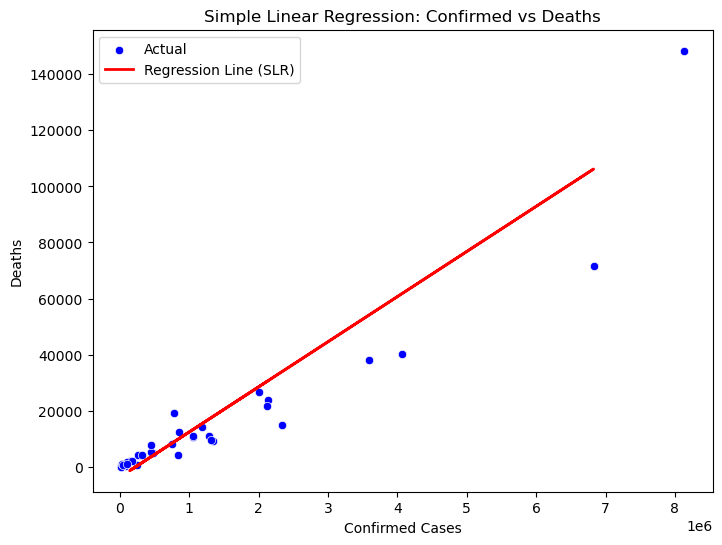

In [220]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=x['confirmed'], y=y, color='blue', label='Actual')
plt.plot(x_test, y_pred, color='red', linewidth=2, label='Regression Line (SLR)')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.title('Simple Linear Regression: Confirmed vs Deaths')
plt.legend()
plt.show()

#### 2. Multiple Linear Regression (MLR)

In [224]:
X = df[['confirmed', 'active', 'passive']]
y = df['deaths']

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [228]:
mlr_model = LinearRegression()
mlr_model.fit(X_train, y_train)

LinearRegression()

In [230]:
print("Intercept:", mlr_model.intercept_)
print("Coefficients:", mlr_model.coef_)

Intercept: -1.291482476517558e-10
Coefficients: [ 1. -1. -1.]


In [232]:
y_pred = mlr_model.predict(X_test)

In [234]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)

R2 Score: 1.0
Mean Squared Error: 9.915124489458749e-20


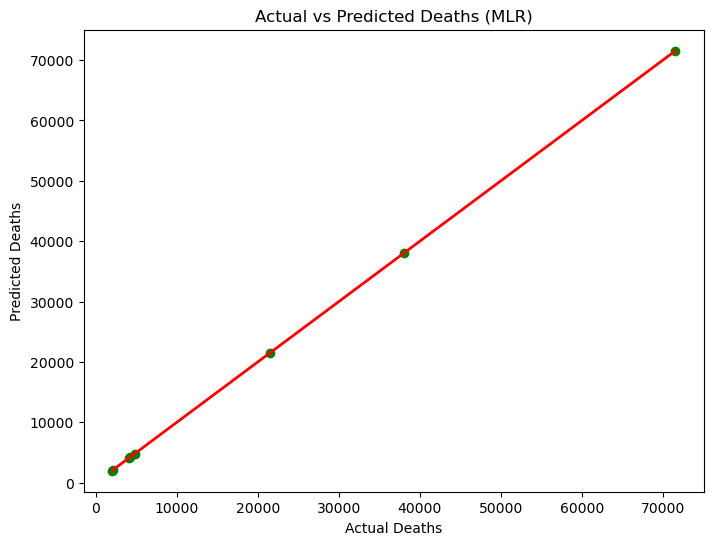

In [236]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='green')
plt.xlabel("Actual Deaths")
plt.ylabel("Predicted Deaths")
plt.title("Actual vs Predicted Deaths (MLR)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2) 
plt.show()

 #### 3. Polynomial Regression

In [244]:
X = df[['confirmed', 'active', 'passive']]  
y = df['deaths']                           

In [246]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X) 

In [248]:
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

In [250]:
poly_model = LinearRegression()
poly_model.fit(X_train, y_train)

LinearRegression()

In [252]:
print("Intercept:", poly_model.intercept_)
print("Number of Coefficients:", len(poly_model.coef_))

Intercept: -0.0013349405180633767
Number of Coefficients: 10


In [254]:
y_pred = poly_model.predict(X_test)

In [256]:
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2 Score:", r2)
print("Mean Squared Error:", mse)

R2 Score: 0.9999999999995142
Mean Squared Error: 0.0002638838564300072


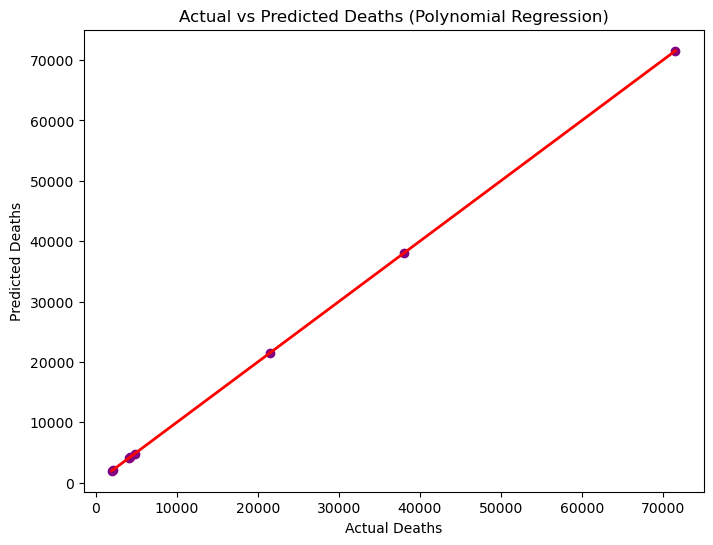

In [258]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, color='purple')
plt.xlabel("Actual Deaths")
plt.ylabel("Predicted Deaths")
plt.title("Actual vs Predicted Deaths (Polynomial Regression)")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2) 
plt.show()

# Conclusion
                1. SLR Model performed poorly compared to MLR and Polynomial Regression.

                2. MLR and Polynomial Regression both achieved an R² score of 1.0 (perfect fit), indicating they explain 100% of the variance in the target variable (deaths).

                3. MSE is almost zero for MLR and Polynomial — this suggests both models predict extremely accurately.
   
               Therefore Multiple Linear Regression is the best and most appropriate model for predicting COVID-19 deaths using the features: confirmed, active, and passive cases. It provides an excellent fit with no overfitting risk compared to the higher complexity Polynomial Regression.